# Computer Vision - P2

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 24th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 RGB histogram visualization

a) Read the image `./images_notebook/rocki.jpeg` and visualize the RGB image as well as each of its channels separately (R, G, and B). Print the image shape and data type.

<img src="images_notebook/rocki.jpeg" width="400" height="400">

**Note:** Before applying the histogram, you should pass the image into float.

In [23]:
import numpy as np # useful for manipulating matrices
from skimage import io, color # useful for image loading and saving
from skimage.exposure import histogram
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks
%matplotlib inline

Shape:  (1024, 768, 3)
Type:  float64


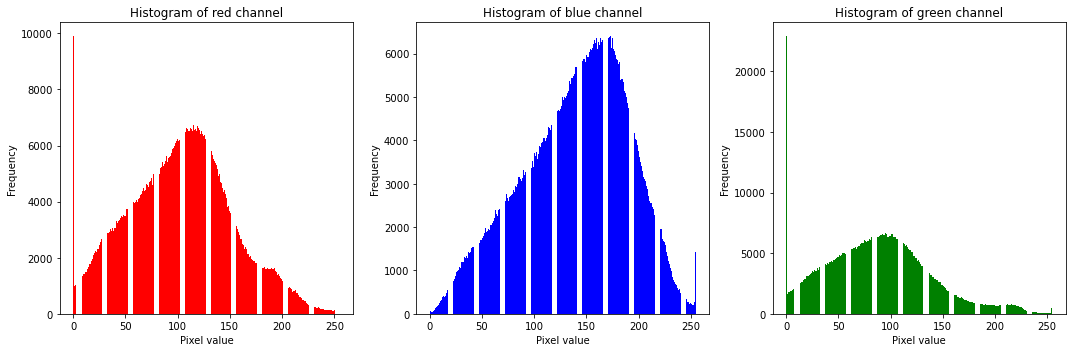

In [25]:
#your solution
q1_img = io.imread('./images_notebook/rocki.jpeg').astype(float)

fig, axs = plt.subplots(1, q1_img.shape[2], figsize=(5 * q1_img.shape[2], 5))

colors = ["red", "blue", "green"]
for i in range(q1_img.shape[2]):
    channel = q1_img[:, :, i]
    hist = histogram(channel)
    axs[i].bar(hist[1], hist[0], color=colors[i])
    axs[i].set_xlabel('Pixel value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title('Histogram of ' + colors[i] + ' channel')

print("Shape: ", q1_img.shape)
print("Type: ", q1_img.dtype)
plt.tight_layout()
plt.show()

Shape:  (1024, 768, 3)
Type:  float64


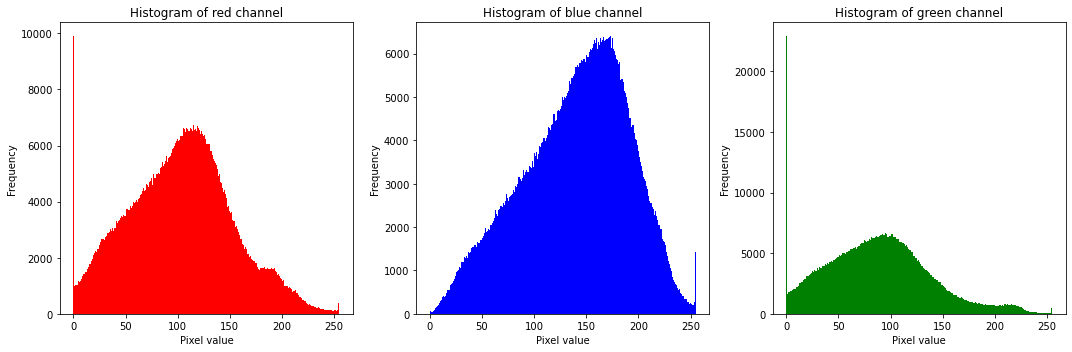

In [18]:
#your solution
q1_img = io.imread('./images_notebook/rocki.jpeg').astype(float)

fig, axs = plt.subplots(1, q1_img.shape[2], figsize=(5 * q1_img.shape[2], 5))

colors = ["red", "blue", "green"]
for i in range(q1_img.shape[2]):
    channel = q1_img[:, :, i]
    hist = histogram(channel)
    axs[i].hist(channel.ravel(), bins=256, color=colors[i])
    axs[i].set_xlabel('Pixel value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title('Histogram of ' + colors[i] + ' channel')

print("Shape: ", q1_img.shape)
print("Type: ", q1_img.dtype)
plt.tight_layout()
plt.show()

b) Make a function `im_hist(im,  nbins=8)` to visualize the histogram of the RGB, and grayscale images. What is the histogram representing for an image? 

The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

- Obtain the histogram with 16, 32, 64 and 256 bins. What are the bins representing?

- Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

**Note:** What type should be the image in order to compute the histogram? Check using different bins for the histogram. 

**Hint** : the `exposure` module within the `skimage` library makes the histogram extraction easy!

**Help:** [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_notebook/histograms.png'>

<img src='images_notebook/histograms2.png'>

<img src='images_notebook/histograms3.png'>

a) Read the image `./images_exam/rocki.jpeg`. Reshape the image to $256x256$ pixels and convert to gray scale (i.e. `rocki_gray`). We are going to apply:

1. Convolve `rocki_gray` with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
2. Convolve `rocki_gray` with a transposed version of the mask in (2).
3. Convolve `rocki_gray` with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

Check the maximum and minimum values, as well as the data type of each imagea.

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.


**Note:** The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

**Note:** Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).


### 2.2 Grayscale and RGB images filtering (convolutions)

In [24]:
from skimage import io
from skimage.transform import resize
from skimage.color import rgb2gray
from scipy.ndimage import convolve
import numpy as np
import matplotlib.pyplot as plt

mask_h1d = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
mask_h1d = np.array(mask_h1d)/15

mask_h1d_full = np.ones((15,15))
mask_h1d_full = mask_h1d_full/225

rocki = io.imread("images_notebook/rocki.jpeg")
rocki_gray = resize(rocki, (256, 256))
rocki_gray = rgb2gray(rocki_gray)

rocki_gray_mask1 =  convolve(rocki_gray, mask_h1d)
rocki_gray_maskT =  convolve(rocki_gray, mask_h1d.T)
rocki_gray_maskFull =  convolve(rocki_gray, mask_h1d_full)


b) Visualize the four images, `rocki_gray` and the output of each step (1 to 3) in a single figure, with the corresponding titles.


Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without pixel values range rescaling.


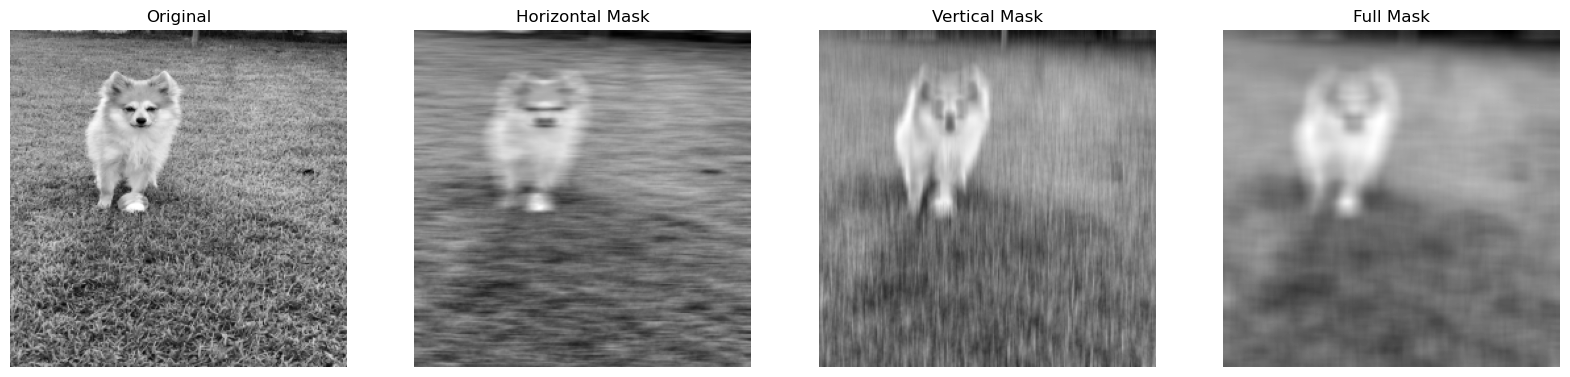

In [33]:
#your solution
fig, axs = plt.subplots(1,4, figsize=(20,20))
axs[0].imshow(rocki_gray, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(rocki_gray_mask1, cmap="gray")
axs[1].set_title("Horizontal Mask")
axs[2].imshow(rocki_gray_maskT, cmap="gray")
axs[2].set_title("Vertical Mask")
axs[3].imshow(rocki_gray_maskFull, cmap="gray")
axs[3].set_title("Full Mask")
for ax in axs:
    ax.axis('off')


c) Can we convolve a color (RGB) image? 

Implement a function `conv_coor(image, mask)` that applies a 3-channel filter.  Reshape the original `rocki.png` image to $256x256$ pixels and try your funcion, using a 15x15 uniform mask.


In [5]:
#your solution


### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce `rocki_gray` 10 times, and check the histogram (i.e. nbins = 32)
2. Augment `rocki_gray` 10 times, and check its histogram (i.e. nbins = 32)

Is there any difference? Please, comment what happens and why.


In [6]:
#your solution

b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original `rocki_gray`image and calculate its histogram.
2. Convolve the reduced `rocki_gray` image 10 times and calculate its histogram.
3. Convolve the augmented `rocki_gray` image 10 times and calculate its histogram.

Comment what happens and why.

In [7]:
#your solution

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `rocki_gray` image:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

**Hint:** Search for the [skimage.filters function](https://scikit-image.org/docs/stable/api/skimage.filters.html) for creating the different filters.

In [8]:
#your solution

b) **(Optional)** Apply the smoothing on some other images and present their results.

In [9]:
#your solution

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

<img src="images_notebook/logo.png" width="400" height="400">


Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Prewitt
2. Sobel
3. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

In [10]:
import warnings
warnings.filterwarnings("ignore")

"""Your Solution"""



'Your Solution'

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed? 
- Which are the limitations of the different images contour extraction?

In [11]:
#your solution

c) How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


In [12]:
#your solution

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `./images_notebook/Capitain_America.jpg` and `./images_notebook/Ironman.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

The result should be something like:

<img src="images_notebook/Capitain.png" width="800" height="800">
<img src="images_notebook/Ironman.png" width="800" height="800">


By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I) image you should define a lower sigma, while for the H(I) you should use a higher one. 

In [13]:
#your solution



In [14]:
#your solution



b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

<img src="images_notebook/Fusion.gif" width="400" height="400">

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see the Ironman face. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

<img src="images_notebook/Hybrid.png" width="800" height="800">


In [15]:
#your solution


### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code and substitute the video frames with their smoothed version, you do not need to implement anything else.

Info about the animation:
Num Frames:200
Images height:180
Images width:320
The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


<IPython.core.display.Javascript object>


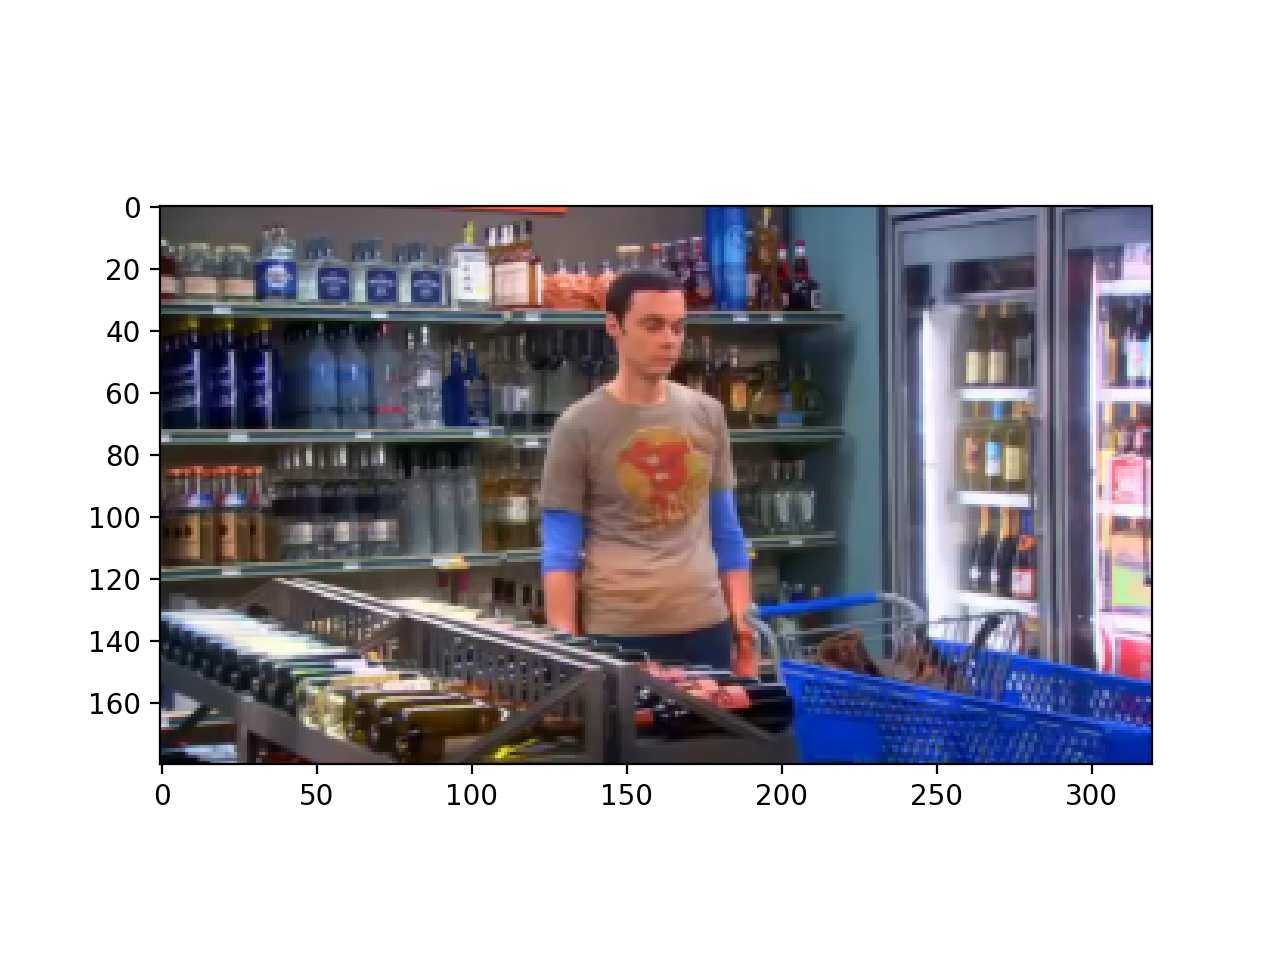

In [16]:

""""Showing one video per annimation"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images_notebook/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale, multichannel=True)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))


%matplotlib nbagg

def updatefig1(i): 
    im.set_array(ic_small[:,:,:,i]) #showing the small image
    plt.draw()
    return im,

fig = plt.figure()
im = plt.imshow(ic_small[:,:,:,0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat= False)
plt.show()


In [17]:
import warnings
warnings.filterwarnings("ignore")